## Phase I - Baseline Model Design and Review - DS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers, regularizers  ### Adding 'regularizers'
from tensorflow.keras.models import Sequential
import pathlib

#### Helper functions

In [2]:
## Resize and Printer Helper
def resize_show(image_path):
    img = tf.keras.utils.load_img(
        image_path, target_size=(300,300)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    plt.imshow(img)
    plt.axis('off')  # Optional: turn off the axis
    plt.show()

#### Data Pull

In [3]:
# Specify the path to the zip file
# dataset_url = "https://dl.dropboxusercontent.com/scl/fi/hgz1prxm1kx14w5riy9du/ls_model_data_three.zip?rlkey=7cv22qxmmaeofr7jn6z7iayjy&dl=0?raw=1"
dataset_url = "https://dl.dropboxusercontent.com/scl/fi/vmox93cwsx2vzrish3l63/land_ls_model_data_four.zip?rlkey=6uykz7bb0aoqbl8hgfkpt1t4f&dl=0?raw=1"

In [9]:
data_dir = tf.keras.utils.get_file('ls_model_data_four.zip', origin=dataset_url, extract=True, cache_subdir='datasets/ls_model_data_four/')
data_dir = pathlib.Path(data_dir).with_suffix('').parent

In [10]:
data_dir

PosixPath('/root/.keras/datasets/ls_model_data_four')

In [12]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3200


In [13]:
## Review folders in incoming data / classes
folders = [folder for folder in data_dir.glob('*') if folder.is_dir()]
print("Folders in the dataset directory:")
for folder in folders:
    print(folder.name)

Folders in the dataset directory:
non_landslide
landslide


In [14]:
land_class_num = len(folders)
land_class_num

2

In [15]:
## Review an image
landslide_one = list(data_dir.glob('landslide/*'))
PIL.Image.open(str(landslide_one[2]))

### Pull in Separate Test Dataset

In [16]:
# Specify the path to the zip file
# https://www.dropbox.com/scl/fi/wbi8iuftwvwnflvjr15pv/test_googleimages_land.zip?rlkey=h2stfvt9ocltsog29l26wo1ls&dl=0
# https://www.dropbox.com/scl/fi/w6fa6pd6hq7815p0jgkm2/test_google_images_landslides_two.zip?rlkey=zxiexqgti6b2nyemywc3itmhm&dl=0
test_dataset_url = "https://dl.dropboxusercontent.com/scl/fi/w6fa6pd6hq7815p0jgkm2/test_google_images_landslides_two.zip?rlkey=zxiexqgti6b2nyemywc3itmhm&dl=0?raw=1"

In [17]:
data_dir_test = tf.keras.utils.get_file('test_google_images_landslides_two.zip', origin=test_dataset_url, extract=True)
data_dir_test = pathlib.Path('/root/.keras/datasets/Google_Earth_Images/').with_suffix('')
data_dir_test

67810869/67810869 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [23]:
## Review folders in incoming data / classes
folders = [folder for folder in data_dir_test.glob('*') if folder.is_dir()]
print("Folders in the test directory:")
for folder in folders:
    print(folder.name)

Folders in the test directory:
landslides
non-landslides


In [24]:
# Drill into each subdirectory and list files
for folder in folders:
    print(f"\nContents of folder '{folder.name}':")
    for subitem in folder.iterdir():
        if subitem.is_file():
            print(f"  File: {subitem.name}")
        elif subitem.is_dir():
            print(f"  Subfolder: {subitem.name}")
            count = len(list(subitem.glob('*.jpg')))
            print(f"{subitem.name}: {count} .jpg images")


Contents of folder 'landslides':
  File: NASA_GoogE_11239_cat.jpg
  File: NASA_GoogE_11540_cat.jpg
  File: nasa_g_4150m_5501_2013_vylg.jpg
  File: NASA_Arc_14329_large.jpg
  File: nasa_g_4500m_11542_2018_cat_town.jpg
  File: nasa_g_4263m_12654_2023_cat.jpg
  File: NASA_GoogE_13710_cat.jpg
  File: NASA_Arc_6038_vylg.jpg
  File: nasa_g_2365m_2024001_2023_cat.jpg
  File: nasa_g_4150m_5501_2013_vylg_two.jpg
  File: nasa_g_4250m_12699_2019_large_v2.jpg
  File: nasa_g_1256m_10038_2018_large.jpg
  File: NASA_Arc_8334_vylg.jpg
  File: NASA_Arc_2787_medium.jpg
  File: NASA_GoogE_14445_cat.jpg
  File: nasa_g_2014m_11257_2020_large.jpg
  File: nasa_g_4250m_12699_2019_large_v4.jpg
  File: .DS_Store
  File: nasa_g_2715m_12699_2019_large_v3.jpg
  File: nasa_g_1950m_14143_2018_vylg.jpg
  File: nasa_g_2785m_11542_2018_cat_town.jpg
  File: nasa_g_4100m_4802_2013_vylg_two.jpg
  File: NASA_GoogE_11454_large.jpg
  File: nasa_g_2715m_12699_2019_large_v2.jpg
  File: nasa_g_2335m_9691_2017_large.jpg
  File:

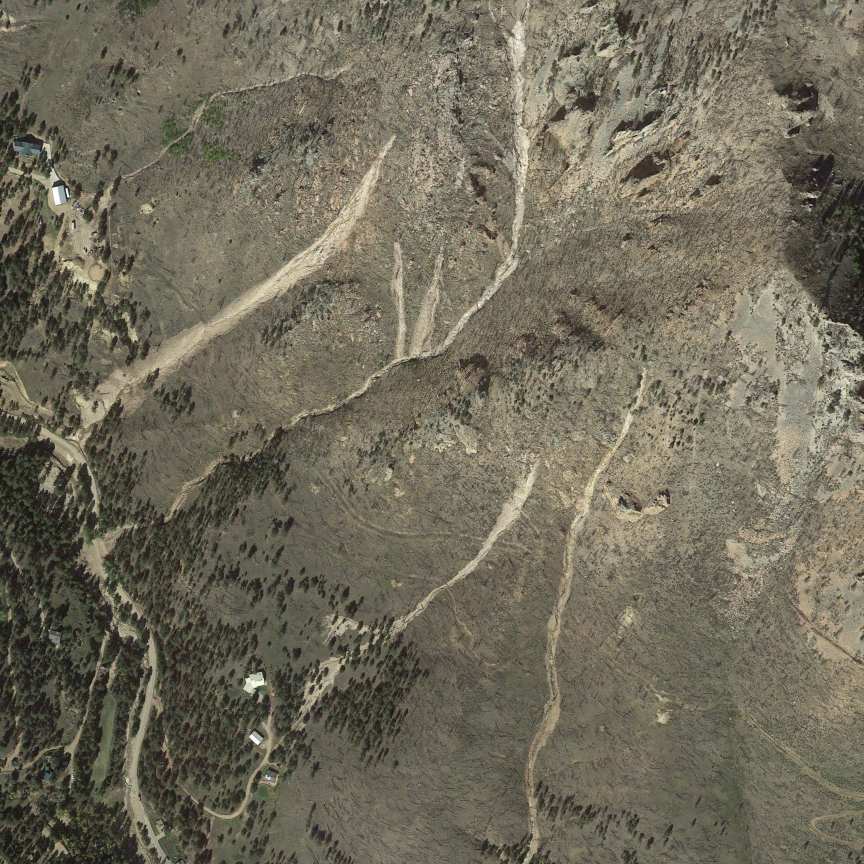

In [26]:
## Review an image
test_one = list(data_dir_test.glob('landslides/*'))
PIL.Image.open(str(test_one[2]))

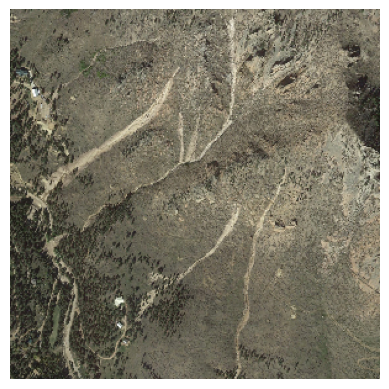

In [27]:
resize_show(test_one[2])

### Training: Setting up Data

In [28]:
## Set Batch, Image size and number of Classes.
batch_size = 32
img_height = 300
img_width = 300

In [29]:
land_class_num

2

In [30]:
## Set Training Set image set.
train_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.20,
  subset="training",
  seed=512,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3200 files belonging to 2 classes.
Using 2560 files for training.


In [31]:
## Setup Valiation set.
valid_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.20,
  subset="validation",
  seed=512,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3200 files belonging to 2 classes.
Using 640 files for validation.


In [32]:
## Review class names based on dataset.
class_names = train_dataset.class_names
print(class_names)

['landslide', 'non_landslide']


In [33]:
## Review sizes of images.
counter_d = 0
for images, labels in train_dataset:
    if counter_d < 3:
        print(images.shape, labels.shape)
    counter_d += 1

(32, 300, 300, 3) (32,)
(32, 300, 300, 3) (32,)
(32, 300, 300, 3) (32,)


In [34]:
## Data Performance
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(2400).prefetch(buffer_size=AUTOTUNE)
valid_dataset = valid_dataset.cache().prefetch(buffer_size=AUTOTUNE)

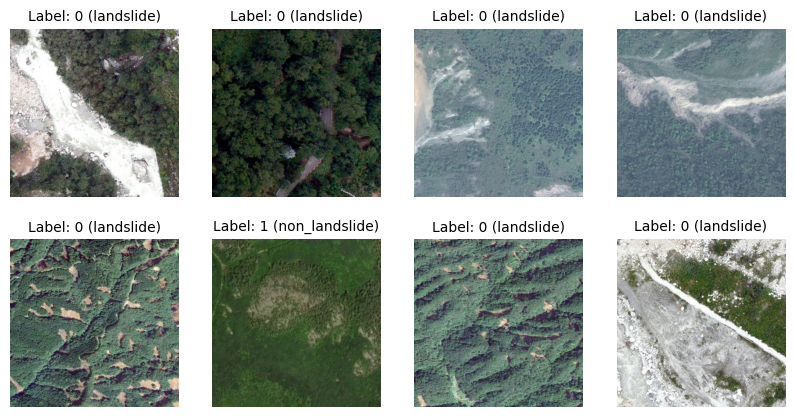

In [35]:
## Checking the Labels.
plt.figure(figsize=(10, 5))
for images, labels in train_dataset.take(1):  # Take one batch
    for i in range(8):  # Display first 6 samples
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label = labels[i].numpy()
        label_name = class_names[label] if 'class_names' in locals() else label
        plt.title(f"Label: {label} ({label_name})", fontsize=10)
        plt.axis("off")
plt.show()


### Test Set

In [37]:
## Update path given the Google_Earth_Images/landslide vs. non-landslide directory structure.
# data_dir_test_lvltwo=pathlib.Path(data_dir_test) / 'Google_Earth_Images'
data_dir_test_lvltwo = data_dir_test
data_dir_test_lvltwo

PosixPath('/root/.keras/datasets/Google_Earth_Images')

In [38]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir_test_lvltwo,   # Base directory
    labels='inferred',           # Automatically assign labels based on folder names
    subset=None,                 # No split; we are directly specifying test data
    seed=512,                    # Random seed for reproducibility
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,  ### Add because the labels and images were getting mixed up in processing.
    validation_split=None,       # No validation split; test data only
)

Found 93 files belonging to 2 classes.


In [39]:
## Review class names based on dataset.
class_names = test_dataset.class_names
print(class_names)

['landslides', 'non-landslides']


In [40]:
## Checking the Labels.
plt.figure(figsize=(10, 5))
for images, labels in test_dataset.take(1):  # Take one batch
    for i in range(12):  # Display first 6 samples
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label = labels[i].numpy()
        label_name = class_names[label] if 'class_names' in locals() else label
        plt.title(f"Label: {label} ({label_name})", fontsize=10)
        plt.axis("off")
plt.show()

<hr style="border:10px solid gray">

**<span style="color:#0638b2; font-size:30px">
Model Design - Baseline
</span>** <br>

#### Plotting Helper

In [41]:
### Plot Helper
def visualize_model_results(model_input):
    acc = model_input.history['accuracy']
    val_acc = model_input.history['val_accuracy']

    loss = model_input.history['loss']
    val_loss = model_input.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2,1,2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

<hr style="border:1px solid gray">

### Design Model Baseline

In [42]:
ls_model_ph_one = Sequential([
  # data_augmentation,  ## Data Augmentation
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 2, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 2, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 2, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    # layers.Dropout(0.2),  ## Dropout
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),  ## Dropout
    layers.Dense(2, activation='softmax')   ### Use with SparseCategoricalCrossentropy
    # layers.Dense(1, activation='sigmoid')   ### Use with BinaryCrossentropy
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Compile**

In [43]:
## Setup model: Optmizer, Loss, Metrics
ls_model_ph_one.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.001),
            loss='sparse_categorical_crossentropy',
              # loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                         # loss='binary_crossentropy',
              metrics=['accuracy'])

In [44]:
ls_model_ph_one.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 300, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 300, 300, 16)        │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 150, 150, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 32)        │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │       2,803,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,814,354 (10.74 MB)

 Trainable params: 2,814,354 (10.74 MB)

 Non-trainable params: 0 (0.00 B)

#### **Fit**
ls_model_ph_one

In [45]:
## Fit Model
epochs = 10
landslide_history_one = ls_model_ph_one.fit(
  train_dataset,
  validation_data=valid_dataset,
  epochs=epochs
)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - accuracy: 0.5858 - loss: 0.6753 - val_accuracy: 0.7672 - val_loss: 0.6234
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7795 - loss: 0.6045 - val_accuracy: 0.8672 - val_loss: 0.5158
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8574 - loss: 0.4880 - val_accuracy: 0.8875 - val_loss: 0.3987
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8766 - loss: 0.3866 - val_accuracy: 0.8891 - val_loss: 0.3411
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8848 - loss: 0.3253 - val_accuracy: 0.8781 - val_loss: 0.2927
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.8886 - loss: 0.2817 - val_accuracy: 0.8938 - val_loss: 0.2717
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8962 - loss: 0.2754 - val_accuracy: 0.8984 - val_loss: 0.2570
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.8988 - loss: 0.2598 - val_accuracy: 0.8875 -

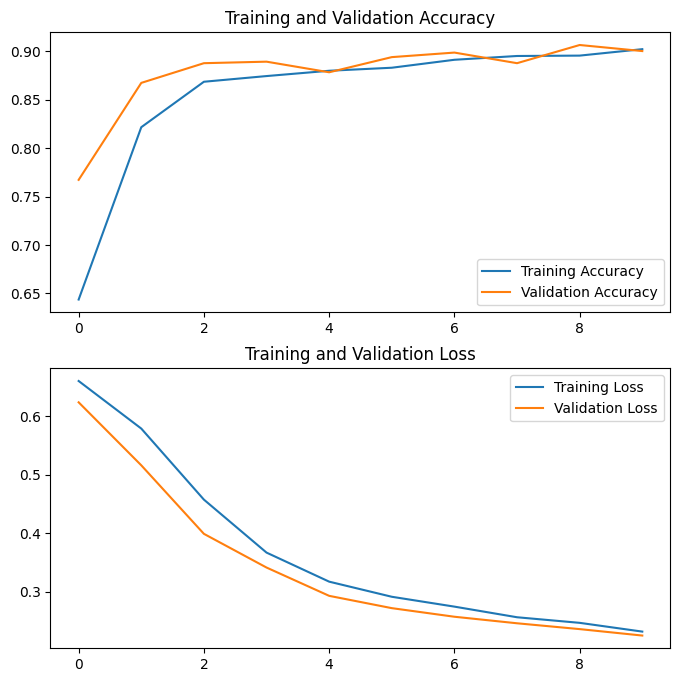

In [46]:
## Plot results
visualize_model_results(landslide_history_one)

#### **Testing**

In [47]:
print("Evaluate on test landslide images")
results = ls_model_ph_one.evaluate(test_dataset)
print("test loss, test acc:", results)

Evaluate on test landslide images
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 989ms/step - accuracy: 0.5730 - loss: 0.8135
test loss, test acc: [0.7758215665817261, 0.5913978219032288]


In [48]:
# Get predictions and true labels
y_pred_probs = ls_model_ph_one.predict(test_dataset)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Get the class with the highest probability
y_true = np.concatenate([y for x, y in test_dataset], axis=0)  # Extract true labels


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step


In [49]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_dataset.class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


### Identify Image File to Prediction|True Labels

In [50]:
# Assuming you already have your test_dataset loaded
file_paths = test_dataset.file_paths  # This retrieves file paths corresponding to each sample

# Print a few file paths to confirm
print("Sample file paths:")
for file in file_paths[:10]:  # Preview first 5 paths
    print(file)

Sample file paths:
/root/.keras/datasets/Google_Earth_Images/landslides/NASA_Arc_11454_large.jpg
/root/.keras/datasets/Google_Earth_Images/landslides/NASA_Arc_14329_large.jpg
/root/.keras/datasets/Google_Earth_Images/landslides/NASA_Arc_2787_medium.jpg
/root/.keras/datasets/Google_Earth_Images/landslides/NASA_Arc_4346_large.jpg
/root/.keras/datasets/Google_Earth_Images/landslides/NASA_Arc_4802_vylg.jpg
/root/.keras/datasets/Google_Earth_Images/landslides/NASA_Arc_6038_vylg.jpg
/root/.keras/datasets/Google_Earth_Images/landslides/NASA_Arc_8334_vylg.jpg
/root/.keras/datasets/Google_Earth_Images/landslides/NASA_Arc_9779_medium.jpg
/root/.keras/datasets/Google_Earth_Images/landslides/NASA_GoogE_10521_large.jpg
/root/.keras/datasets/Google_Earth_Images/landslides/NASA_GoogE_11239_cat.jpg


In [51]:
# Get predictions
y_pred_probs = ls_model_ph_one.predict(test_dataset)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Predicted class

# Extract true labels
y_true = np.concatenate([y for _, y in test_dataset], axis=0)

# Map file paths to predictions
file_class_map = zip(file_paths, y_pred, y_true)  # Zip paths, predictions, and true labels

print("\nImages with predicted and true labels:")
for file_path, pred, true in file_class_map:
    if pred != true:    ## Added to only see where prediction is INCORRECT...
        print(f"File: {file_path}, Predicted: {pred}, True Label: {true}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/step

Images with predicted and true labels:
File: /root/.keras/datasets/Google_Earth_Images/landslides/NASA_Arc_11454_large.jpg, Predicted: 1, True Label: 0
File: /root/.keras/datasets/Google_Earth_Images/landslides/NASA_Arc_2787_medium.jpg, Predicted: 1, True Label: 0
File: /root/.keras/datasets/Google_Earth_Images/landslides/NASA_Arc_4802_vylg.jpg, Predicted: 1, True Label: 0
File: /root/.keras/datasets/Google_Earth_Images/landslides/NASA_Arc_6038_vylg.jpg, Predicted: 1, True Label: 0
File: /root/.keras/datasets/Google_Earth_Images/landslides/NASA_Arc_9779_medium.jpg, Predicted: 1, True Label: 0
File: /root/.keras/datasets/Google_Earth_Images/landslides/NASA_GoogE_11540_cat.jpg, Predicted: 1, True Label: 0
File: /root/.keras/datasets/Google_Earth_Images/landslides/NASA_GoogE_14445_cat.jpg, Predicted: 1, True Label: 0
File: /root/.keras/datasets/Google_Earth_Images/landslides/nasa_g_1256m_10038_2018_large.jpg, Predicted: 1, True Label: 0
File: /root/

<hr style="border:7px solid darkred">

**<span style="color:#0638b2; font-size:30px">
Model Design w/ Transfer Learning
</span>** <br>


Pre-Training with EfficientNet
- Strengths: EfficientNet models scale well in terms of parameters and efficiency, balancing accuracy with computational cost, which is especially useful for large datasets.
- Suitability: EfficientNet performs exceptionally well on high-resolution images, which is ideal for detecting fine details in satellite images.
- https://viso.ai/deep-learning/efficientnet/
- https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/

**Setting up EfficientNet**
- Note - using B3 as this is set up for 300x300 images.

In [52]:
## Import
from tensorflow.keras.applications import EfficientNetB3

In [53]:
# Setting up parameters for model.
IMG_SIZE=300
learn_rate_land = .0001  ## For optimizer.
print(land_class_num) ## Check class number AND use as argument below.

2


**Helper Functions**

Saturation
- The saturation factor is sampled randomly from a uniform distribution in the range [lower, upper].
- A saturation factor of 1.0 means no change in saturation.
- A saturation factor below 1.0 decreases the saturation (the image will appear less vibrant or more grayscale).
- A saturation factor above 1.0 increases the saturation (the image will appear more vibrant).

In [54]:
## Helper Data Augmentation
data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=0.15),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomFlip("horizontal"),
    layers.RandomContrast(factor=0.4),
    # layers.RandomSaturation(.7, seed=516) ## Error
    layers.Lambda(lambda x: tf.image.random_saturation(x, lower=0.1, upper=1))
  ]
)

In [55]:
# Create the base model from the pre-trained model EfficientNetB3.
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    ### Adding Augmentation
    inputs = data_augmentation(inputs)  ## Added Line
    model = EfficientNetB3(include_top=False, input_tensor=inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

    # Compile
    model = keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = keras.optimizers.Adam(learning_rate=learn_rate_land)  ## originally 1e-2
    model.compile(
        # optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )
    return model


## Review model design.
landslide_model_ENB3.summary()

In [56]:
landslide_model_ENB3 = build_model(num_classes=land_class_num)

epochs = 20  # @param {type: "slider", min:8, max:80}
landslide_ENB3_hist = landslide_model_ENB3.fit(train_dataset, epochs=epochs, validation_data=valid_dataset)


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 66s 263ms/step - accuracy: 0.7936 - loss: 0.4738 - val_accuracy: 0.9625 - val_loss: 0.2163
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 47s 141ms/step - accuracy: 0.9376 - loss: 0.1397 - val_accuracy: 0.9797 - val_loss: 0.1193
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.9729 - loss: 0.0743 - val_accuracy: 0.9844 - val_loss: 0.0730
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 0.9794 - loss: 0.0587 - val_accuracy: 0.9844 - val_loss: 0.0531
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 0.9882 - loss: 0.0460 - val_accuracy: 0.9844 - val_loss: 0.0412
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - accuracy: 0.9878 - loss: 0.0372 - val_accuracy: 0.9922 - val_loss: 0.0305
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.9900 - loss: 0.0375 - val_accuracy: 0.9906 - val_loss: 0.0266
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 139m

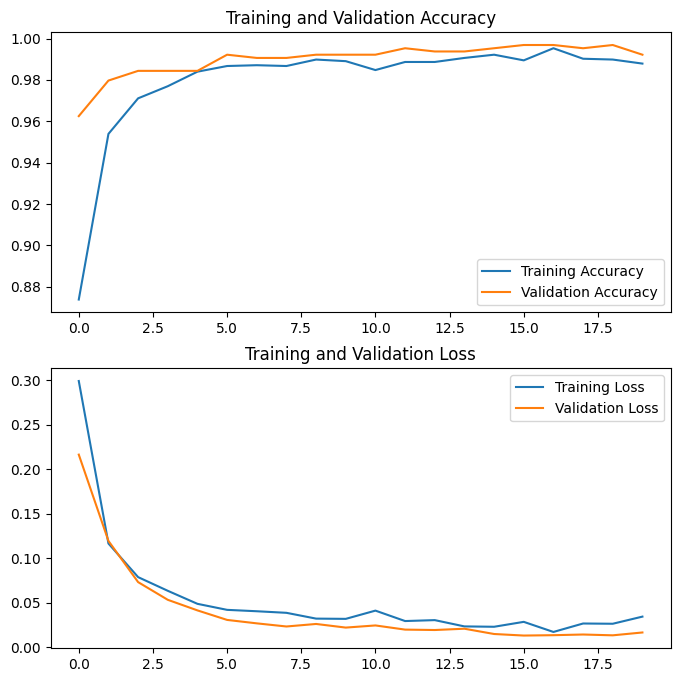

In [57]:
## Plot results
visualize_model_results(landslide_ENB3_hist)

#### **Testing**

In [58]:
print("Evaluate on test landslide images")
results = landslide_model_ENB3.evaluate(test_dataset)
print("test loss, test acc:", results)

Evaluate on test landslide images
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 7s/step - accuracy: 0.6253 - loss: 1.3288
test loss, test acc: [1.1095318794250488, 0.6881720423698425]


In [59]:
# Get predictions and true labels
y_pred_probs = landslide_model_ENB3.predict(test_dataset)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Get the class with the highest probability
y_true = np.concatenate([y for x, y in test_dataset], axis=0)  # Extract true labels

3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step


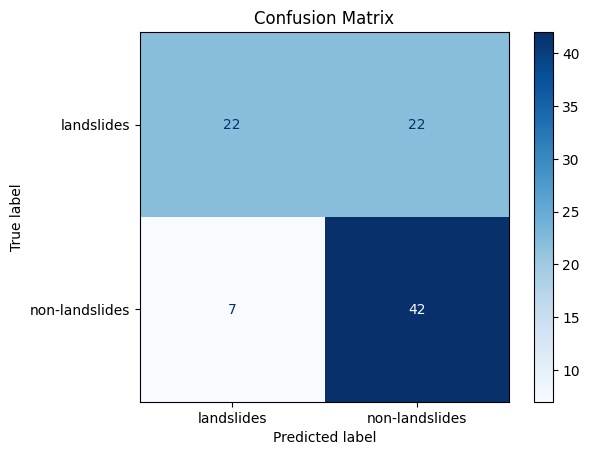

In [60]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_dataset.class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [61]:
# file_paths = test_dataset.file_paths  # This retrieves file paths corresponding to each sample
# # Get predictions
# y_pred_probs = landslide_model_ENB3.predict(test_dataset)  # Predict probabilities
# y_pred = np.argmax(y_pred_probs, axis=1)  # Predicted class

# Extract true labels
y_true = np.concatenate([y for _, y in test_dataset], axis=0)

# Map file paths to predictions
file_class_map = zip(file_paths, y_pred, y_true)  # Zip paths, predictions, and true labels

print("\nImages with predicted and true labels:")
for file_path, pred, true in file_class_map:
    if pred != true & true == 1:    ## Added to only see where prediction is INCORRECT...
        print(f"File: {file_path}, Predicted: {pred}, True Label: {true}")



Images with predicted and true labels:
File: /root/.keras/datasets/Google_Earth_Images/non-landslides/nasa_g_1950m_14143_2017_vylg_nonL.jpg, Predicted: 0, True Label: 1
File: /root/.keras/datasets/Google_Earth_Images/non-landslides/nasa_g_2150m_9734_2017_vylg_nonL.five.jpg, Predicted: 0, True Label: 1
File: /root/.keras/datasets/Google_Earth_Images/non-landslides/nasa_g_2150m_9734_2017_vylg_nonL.three.jpg, Predicted: 0, True Label: 1
File: /root/.keras/datasets/Google_Earth_Images/non-landslides/nasa_g_2150m_9734_2017_vylg_nonL_four.jpg, Predicted: 0, True Label: 1
File: /root/.keras/datasets/Google_Earth_Images/non-landslides/nasa_g_2400m_9734_2020_vylg_nonL_ten.jpg, Predicted: 0, True Label: 1
File: /root/.keras/datasets/Google_Earth_Images/non-landslides/nasa_g_2785m_11542_2021_cat_nonL_two.jpg, Predicted: 0, True Label: 1
File: /root/.keras/datasets/Google_Earth_Images/non-landslides/nasa_g_4150m_5501_2012_vylg_nonL.jpg, Predicted: 0, True Label: 1


<hr style="border:2px solid gray">

## Testing a single image.

#### Helper Functions

In [62]:
## Prediction Helper
def predict_landslide_image(image_path, model):
    img = tf.keras.utils.load_img(
        image_path, target_size=(img_height, img_width) )

    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    # score = tf.nn.softmax(predictions[0])
    score = predictions[0]

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

---

### Image One

In [63]:
## Load Image
landslide_img_one_url = "https://dl.dropboxusercontent.com/scl/fi/viovy9pcma2y6hq58ntns/NASA_GoogE_14445.jpg?rlkey=ltitymrzuarrxxogge32c1kbi&dl=0?raw=1"
landslide_img_one_path = tf.keras.utils.get_file('NASA_GoogE_14445', origin=landslide_img_one_url)

560085/560085 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


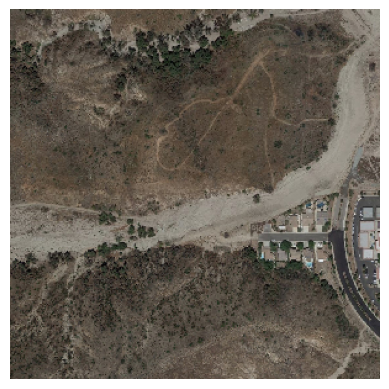

In [64]:
resize_show(landslide_img_one_path)

#### **Prediction**

In [65]:
predict_landslide_image(landslide_img_one_path, landslide_model_ENB3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
This image most likely belongs to landslides with a 99.20 percent confidence.


### Image Two

In [66]:
landslide_img_two_url = "https://dl.dropboxusercontent.com/scl/fi/7x41si7aih0bjh1py2phy/NASA_GoogE_14445_NonSlide.jpg?rlkey=3ll97pdrjwr9b10rcvineeynm&dl=0?raw=1"
landslide_img_two_path = tf.keras.utils.get_file('NASA_GoogE_14445_NonSlide', origin=landslide_img_two_url)

598878/598878 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [67]:
resize_show(landslide_img_two_path)

#### **Prediction**

In [68]:
predict_landslide_image(landslide_img_two_path, landslide_model_ENB3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
This image most likely belongs to non-landslides with a 99.99 percent confidence.


## Additional Exploration

### ResNet 50

In [73]:
## Helper Data Augmentation
data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=0.15),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomFlip("horizontal"),
    layers.RandomContrast(factor=0.1),
    # layers.RandomSaturation(.7, seed=516) ## Error
    layers.Lambda(lambda x: tf.image.random_saturation(x, lower=0.7, upper=1.5))
  ]
)

In [74]:
from tensorflow.keras.applications import ResNet50

# Create the base model from the pre-trained model ResNet50.
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    ### Adding Augmentation
    inputs = data_augmentation(inputs)  ## Added Line
    base_model = ResNet50(include_top=False, input_tensor=inputs, weights="imagenet")

    # Freeze the pretrained weights
    base_model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

    # Compile
    model = keras.Model(inputs, outputs, name="ResNet50")
    optimizer = keras.optimizers.Adam(learning_rate=learn_rate_land)  ## originally 1e-2
    #optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001) # marginally better but hard to say
    model.compile(
        # optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )
    return model


In [75]:
landslide_model_RN50 = build_model(num_classes=land_class_num)

epochs = 10  # @param {type: "slider", min:8, max:80}
landslide_RN50_hist = landslide_model_RN50.fit(train_dataset, epochs=epochs, validation_data=valid_dataset)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 31s 213ms/step - accuracy: 0.9006 - loss: 0.2198 - val_accuracy: 0.9812 - val_loss: 0.0686
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 172ms/step - accuracy: 0.9928 - loss: 0.0248 - val_accuracy: 0.9969 - val_loss: 0.0250
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.9991 - loss: 0.0111 - val_accuracy: 0.9953 - val_loss: 0.0164
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 173ms/step - accuracy: 0.9985 - loss: 0.0072 - val_accuracy: 0.9969 - val_loss: 0.0129
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 174ms/step - accuracy: 0.9996 - loss: 0.0055 - val_accuracy: 0.9953 - val_loss: 0.0115
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 16s 205ms/step - accuracy: 0.9991 - loss: 0.0046 - val_accuracy: 0.9969 - val_loss: 0.0061
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 175ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9969 - val_loss: 0.0056
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 177m

As we can see, significantly better performance with the same architecture compared to ENB3 within only 10 epochs.

In [76]:
from tensorflow.keras.models import clone_model
from IPython.display import Image, display
import matplotlib as mpl

In [77]:

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name,last_deep_layer_name,pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.get_layer(last_deep_layer_name).output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))



In [86]:
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

landslide_model_RN50_clone = clone_model(landslide_model_RN50) #cloning so we can leave the original one intact
landslide_model_RN50_clone.layers[-1].activation = None #turn activation off for the last prediction layer
last_conv_layer_name = "conv5_block3_out" #take the last convolutional layer # different in resnet50
last_deep_layer_name = "pred"


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


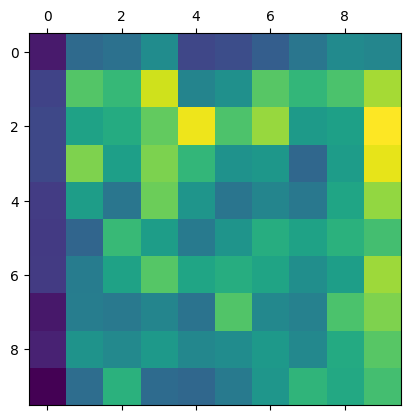

In [87]:
img_size = (300, 300)

img_array = preprocess_input(get_img_array(landslide_one[0], size=img_size))

preds = landslide_model_RN50_clone.predict(img_array)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, landslide_model_RN50_clone, last_conv_layer_name,last_deep_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

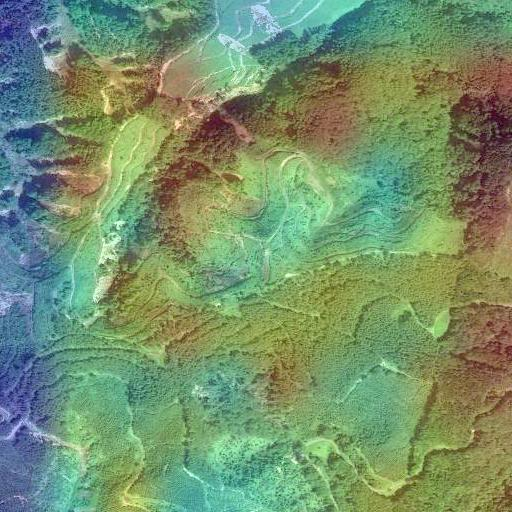

In [88]:
save_and_display_gradcam(landslide_one[0], heatmap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


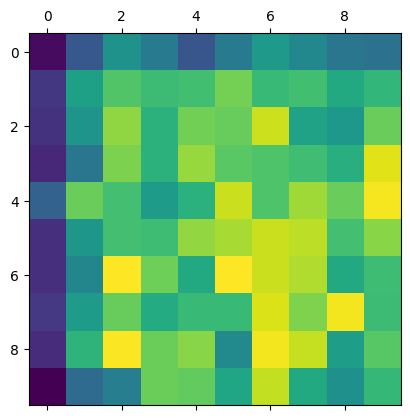

In [90]:
img_array = preprocess_input(get_img_array(landslide_one[2], size=img_size))

preds = landslide_model_RN50_clone.predict(img_array)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, landslide_model_RN50_clone, last_conv_layer_name,last_deep_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()


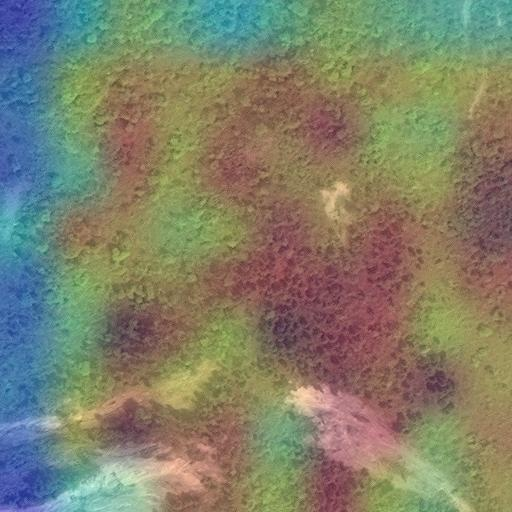

In [91]:
save_and_display_gradcam(landslide_one[2], heatmap)

Vague results from Grad-CAM.

### Testing

In [113]:
print("Evaluate on test landslide images")
results = landslide_model_RN50.evaluate(test_dataset)
print("test loss, test acc:", results)

Evaluate on test landslide images
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.5252 - loss: 2.6055
test loss, test acc: [2.087759256362915, 0.6129032373428345]


In [114]:
# Get predictions and true labels
y_pred_probs = landslide_model_RN50.predict(test_dataset)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Get the class with the highest probability
y_true = np.concatenate([y for x, y in test_dataset], axis=0)  # Extract true labels

3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step


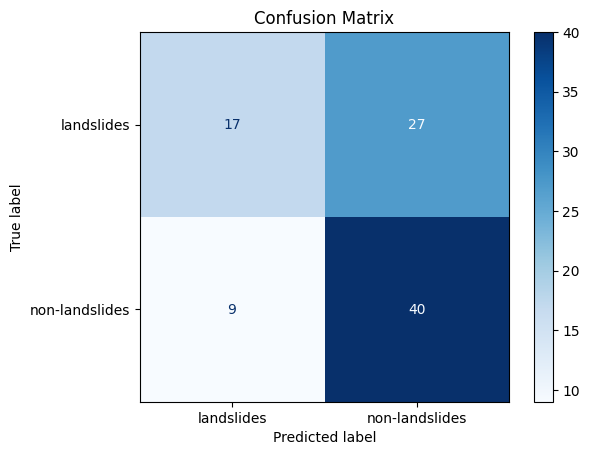

In [115]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_dataset.class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Poorer performance on test set.

### Grayscale

One of our concerns is that the model is fixating on whether or not there is forest, i.e., the spots that aren't green. This could affect results in imagery that isn't forested. We wanted to try and see if there is a difference if we "normalize" the data by removing color.

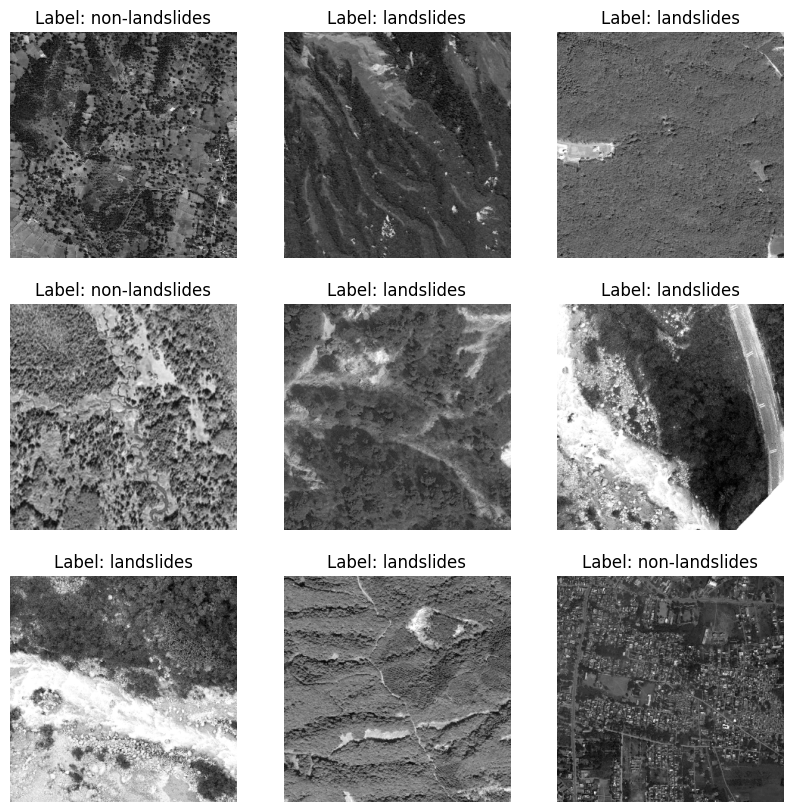

In [72]:
import matplotlib.pyplot as plt
import tensorflow as tf

for images, labels in train_dataset.take(1):
    # convert to grayscale
    grayscale_images = tf.image.rgb_to_grayscale(images)

    plt.figure(figsize=(10, 10))
    for i in range(9): # 3x3
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(grayscale_images[i].numpy().squeeze(), cmap='gray')
        plt.title(f"Label: {class_names[labels[i]]}")
        plt.axis("off")
    plt.show()

In [92]:
## Helper Data Augmentation
data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(factor=0.15),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomFlip("horizontal"),
    layers.RandomContrast(factor=0.1),
    # layers.RandomSaturation(.7, seed=516) ## Error
    layers.Lambda(lambda x: tf.image.random_saturation(x, lower=0.7, upper=1.5))
  ]
)

In [101]:
from tensorflow.keras.applications import ResNet50

# Custom layer for grayscale conversion
class GrayscaleLayer(layers.Layer):
    def call(self, inputs):
        # Convert RGB to grayscale and repeat channels since RN50 expects 3 channels
        grayscale = tf.image.rgb_to_grayscale(inputs)
        return tf.repeat(grayscale, repeats=3, axis=-1)

# Create the base model from the pre-trained model ResNet50.
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # Convert RGB to grayscale and back to 3 channels (since RN50 expects 3)
    grayscale_rgb = GrayscaleLayer()(inputs)

    # augmentation
    augmented = data_augmentation(grayscale_rgb) # Note: none of them should add color

    base_model = ResNet50(include_top=False, input_tensor=augmented, weights="imagenet")

    # Freeze the pretrained weights
    base_model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

    # Compile
    model = keras.Model(inputs, outputs, name="ResNet50")
    optimizer = keras.optimizers.Adam(learning_rate=learn_rate_land)  ## originally 1e-2
    #optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    model.compile(
        # optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )
    return model


In [102]:
landslide_model_RN50_gray = build_model(num_classes=land_class_num)

epochs = 10  # @param {type: "slider", min:8, max:80}
landslide_RN50_gray_hist = landslide_model_RN50_gray.fit(train_dataset, epochs=epochs, validation_data=valid_dataset)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 31s 299ms/step - accuracy: 0.8480 - loss: 0.3574 - val_accuracy: 0.9656 - val_loss: 0.1230
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 39s 270ms/step - accuracy: 0.9456 - loss: 0.1405 - val_accuracy: 0.9750 - val_loss: 0.0801
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 274ms/step - accuracy: 0.9624 - loss: 0.0942 - val_accuracy: 0.9688 - val_loss: 0.0785
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 277ms/step - accuracy: 0.9687 - loss: 0.0796 - val_accuracy: 0.9781 - val_loss: 0.0509
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 287ms/step - accuracy: 0.9680 - loss: 0.0828 - val_accuracy: 0.9859 - val_loss: 0.0337
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 277ms/step - accuracy: 0.9709 - loss: 0.0726 - val_accuracy: 0.9828 - val_loss: 0.0442
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 42s 285ms/step - accuracy: 0.9718 - loss: 0.0735 - val_accuracy: 0.9828 - val_loss: 0.0470
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 280ms/step - accuracy: 0.9803 - loss: 0.0553 - val_accu

Issues with Grad-CAM, needs further exploration

In [109]:
def get_img_array(img_path, size):
    # Load the image in grayscale
    img = keras.utils.load_img(img_path, color_mode="grayscale", target_size=size)
    # Convert to array and repeat channels to make it (299, 299, 3)
    array = keras.utils.img_to_array(img)
    array = np.repeat(array, 3, axis=-1)  # Repeat grayscale values across 3 channels
    # Expand dimensions to create a batch of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name,last_deep_layer_name,pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.get_layer(last_deep_layer_name).output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the grayscale original image and convert to a 3-channel grayscale array
    img = keras.utils.load_img(img_path, color_mode="grayscale")
    img = keras.utils.img_to_array(img)
    img = np.repeat(img, 3, axis=-1)  # Repeat channels to have RGB format

    # Rescale heatmap to a range of 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Get RGB values from the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Convert the colorized heatmap to an image array
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original grayscale image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad-CAM
    display(Image.open(cam_path))



In [110]:
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

# not cloning since it causes issues due to Lambda layer
landslide_model_RN50_gray.layers[-1].activation = None
last_conv_layer_name = "conv5_block3_out" #take the last convolutional layer # different in resnet50
last_deep_layer_name = "pred"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


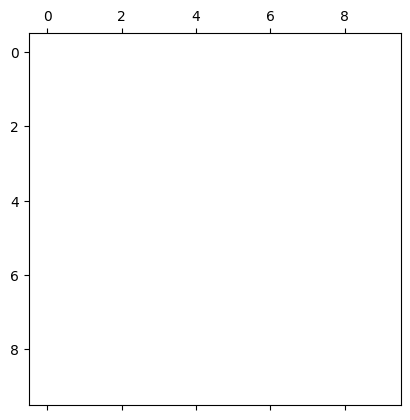

In [111]:
img_size = (300, 300)

img_array = preprocess_input(get_img_array(landslide_one[0], size=img_size))

preds = landslide_model_RN50_gray.predict(img_array)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, landslide_model_RN50_gray, last_conv_layer_name,last_deep_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [112]:
save_and_display_gradcam(landslide_one[0], heatmap)

<ipython-input-109-fb1aac8d5e75>:52: RuntimeWarning: invalid value encountered in cast
  heatmap = np.uint8(255 * heatmap)


AttributeError: type object 'Image' has no attribute 'open'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


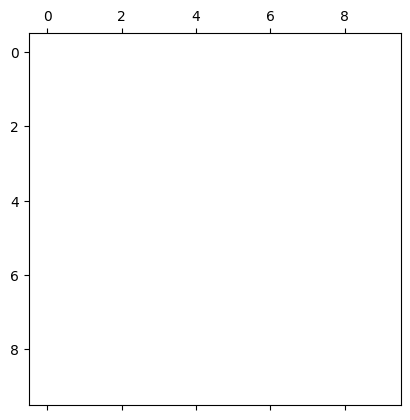

In [108]:
img_array = preprocess_input(get_img_array(landslide_one[2], size=img_size))

preds = landslide_model_RN50_gray.predict(img_array)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, landslide_model_RN50_gray, last_conv_layer_name,last_deep_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()


In [ ]:
save_and_display_gradcam(landslide_one[2], heatmap)